the width:  275
the height:  183


(<Axes: >, <matplotlib.image.AxesImage at 0x2b58c4a7140>)

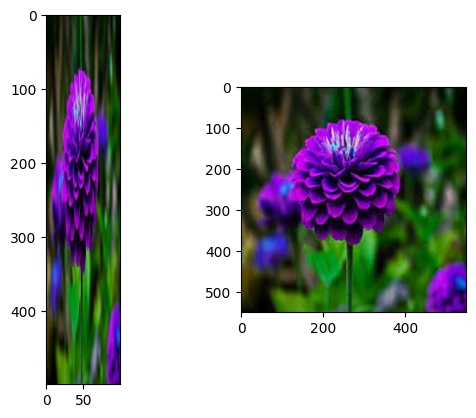

In [72]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread("download.jpg")

h, w, z = image.shape

print("the width: ", w)
print("the height: ", h)

new_width_height = (100, 500)

new_image = cv2.resize(image, new_width_height)

new_image_two = cv2.resize(image, (0, 0), fx=2, fy=3, interpolation=cv2.INTER_CUBIC)
plt.subplot(121),
plt.imshow(new_image)

plt.subplot(122), plt.imshow(new_image_two)


(<Axes: title={'center': 'green histogram'}>,
 Text(0.5, 1.0, 'green histogram'),
 <BarContainer object of 256 artists>)

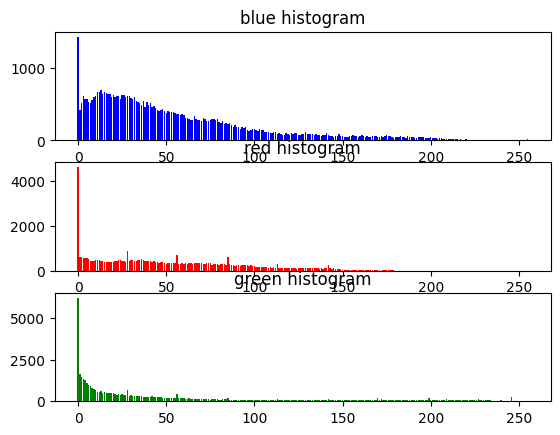

In [78]:
import cv2

image = cv2.imread("download.jpg")

blue_image = cv2.calcHist([image], [0], None, [256], [0,256])
red_image = cv2.calcHist([image], [1], None, [256], [0, 265])
green_image = cv2.calcHist([image], [2], None, [256], [0, 265])

plt.subplot(311), plt.title("blue histogram"), plt.bar(range(0, 256), blue_image.flatten().tolist(), color="blue")
plt.subplot(312), plt.title("red histogram"), plt.bar(range(0, 256), red_image.flatten().tolist(), color="red")
plt.subplot(313), plt.title("green histogram"), plt.bar(range(0, 256), green_image.flatten().tolist(), color="green")



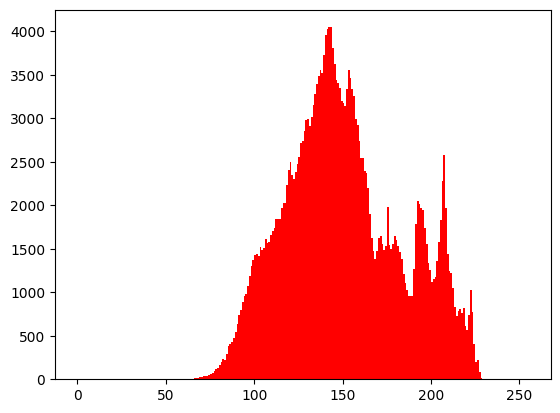

In [122]:
from PIL import Image
from matplotlib import pyplot as plt

image = Image.open("contrast.png")

multiChannel = image.split()

_, bins, binary = plt.hist(list(multiChannel[1].getdata()), bins=range(0, 256), color="red" )

countsfor_r = multiChannel[0].histogram()



<BarContainer object of 256 artists>

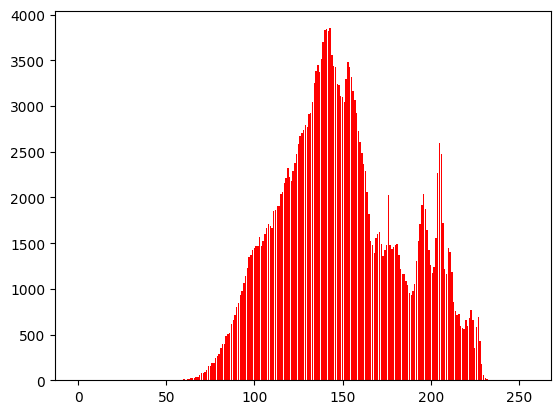

In [116]:
plt.bar(range(0, 256), countsfor_r, color="red")

(<Axes: >, <matplotlib.image.AxesImage at 0x2b5963f21e0>)

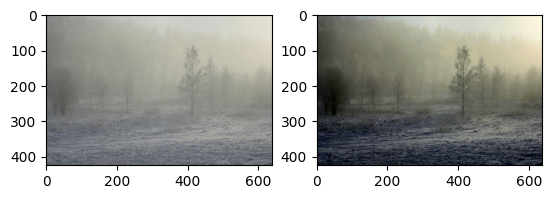

In [125]:
def strachContrast(ex):
    iI  = ex
    minI    = 86
    maxI    = 230
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO


red_Channel = multiChannel[0].point(strachContrast)
blue_Channel = multiChannel[1].point(strachContrast)
green_Channel = multiChannel[2].point(strachContrast)

final_image = Image.merge("RGB", (red_Channel, blue_Channel, green_Channel))

plt.subplot(121), plt.imshow(image)
plt.subplot(122), plt.imshow(final_image)

